#  Fraud Detection  
The dataset contains credit card transaction in september 2013 by european card holders. Due to cofidentiality purposes, the data has gone through PCA transformation. Often, when analyzing fraud detection we are dealing with data that are unbalanced. As a consequence, traditional accuracy evaluation may not give good insight on how well our machine learning algorithm is working. In these cases, we may get high accuracy by just predicting every output as non-fraud, but we fail to successfuly predict every fraud instances. Due to the highly skewed outputs, we will use F1 as our performance metric, and some other methods to try and accurately predict fraud activity.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("C:/Users/sasan/Downloads/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# finding missing values
data.isnull().sum().max()
print(round(sum(data["Class"]== 0)/ len(data["Class"]) * 100, 2), "of data are classified as non-fraud")
print(round(sum(data["Class"]==1) / len(data["Class"]) * 100 , 2), "of data are classified as fraud")

99.83 of data are classified as non-fraud
0.17 of data are classified as fraud


Text(0.5, 1.0, 'barplot /n {not faraud : 1} , {fraud : 2}')

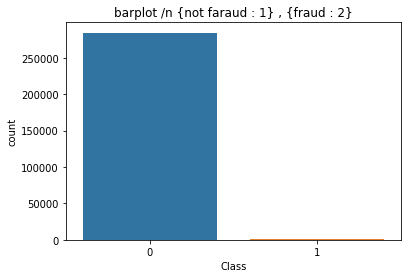

In [12]:
sns.countplot("Class" , data= data)
plt.title("barplot /n {not faraud : 1} , {fraud : 2}")

# skewed distribution 

It is visible that the dataset is very unbalanced. Most of our transaction have relatively low amount, and outliers reach to 25000 thousand indicative of possible fradulant activity. 

Text(0.5, 1.0, 'distribution plot of/n time of transactions')

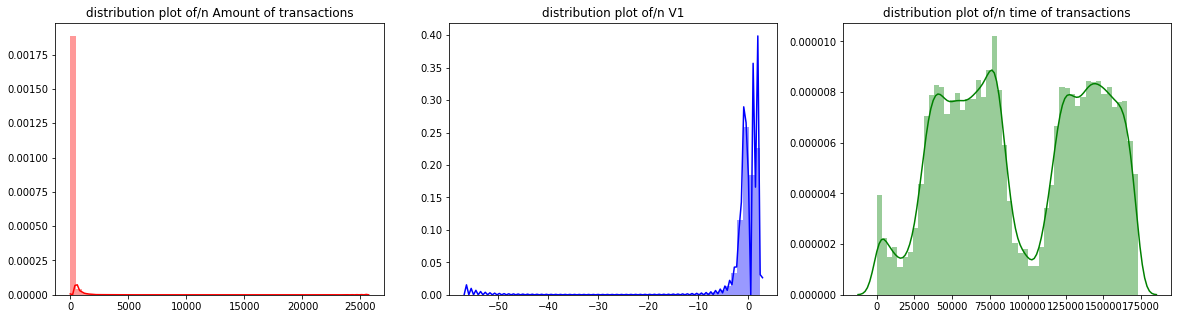

In [13]:
plot1 , axs1 = plt.subplots(1 , 3 , figsize=(20,5))

sns.distplot(data["Amount"].values, ax = axs1[0] ,color = "r")
axs1[0].set_title("distribution plot of/n Amount of transactions")

sns.distplot(data["V1"].values, ax = axs1[1], color = "b")
axs1[1].set_title("distribution plot of/n V1")

sns.distplot(data["Time"].values, ax = axs1[2], color = "green")
axs1[2].set_title("distribution plot of/n time of transactions")


# Normalizing Time and Amont

Since all of the PCA transformed Variables are normalized, we will normalize Time and Amount variables. 

In [14]:
from sklearn.preprocessing import RobustScaler , StandardScaler

# robust scaler are less prones to outliers

data["Amount_norm"] = RobustScaler().fit_transform(np.array(data["Amount"]).reshape(-1,1))
data["Time_norm"] = RobustScaler().fit_transform(np.array(data["Time"]).reshape(-1,1))



data.drop(columns= ['Time' , 'Amount'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_norm,Time_norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.256131,-0.994960
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.237686,-0.994937
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,0.262698,-0.994901
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.994900,-0.994901
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.255991,-0.994878


# Split Data 
Now that we have constructed a normalized dataset we want to split our data into train and test sets. The reason for this is due to preventing our model to overfit the dataset, and evaluate the accuracy of the model by training the model on the train set and testing the performance on the test set. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']


sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index , test_index in sss.split(X ,y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Array form 
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values



# Under Sampling Method

Under sampling is a method used to adress highly skewed data by resampling the data so that we end up with 0.5 ratio for both fraud and non-fraud observations. 


In [15]:
# shuffling data before creating the subsample

data = data.sample(frac=1)



number_fraud = len(data[data.Class == 1])
print("Number of fraud transactions:", number_fraud )
print("Number of non-fraud transactions:", sum(data['Class'] != 1) )


fraud_idx = np.array(data[data.Class == 1].index)
non_fraud = data[data.Class == 0].index

non_fraud_idx = np.random.choice(non_fraud , number_fraud, replace = False)
non_fraud_idx = np.array(non_fraud_idx)

under_sample_idx = np.concatenate([non_fraud_idx , fraud_idx])
under_sample_data = data.iloc[under_sample_idx,:]

print("Percentage of non fraud transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))




Number of fraud transactions: 492
Number of non-fraud transactions: 284315
Percentage of non fraud transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


# Implementing Algorithms  

In this section we will use two popular ML algorithms, Support Vector Machines, and Logistic Regression. 

 * ## Logistic Regression 
   Logistic regression is among the simpler classification models. The way this model makes predictions is by classifing the values depicted in the following plot with negetive values on the x-axis as non-fraud, and the values on the positive side as fraud. 
   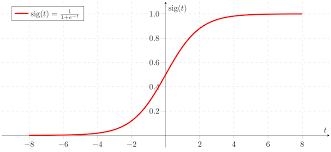
 * ## Support Vector Machines 
   SVM is a relatively new model which has a convoluted mathematical process, yet it is easy to get an intuition of what it does. In the case of support vector machines, we aim to find the best hyperplane that seperates different classes. As depicted in the plot below, we have three lines(hyperplanes), and we want to find the best one to correctly classify our data points. First, the green line completely fails tocorrectly classify our linearly seperable(able to seperate by one line) data. Second, Although the blue line seperates the data correctly, it the ands of the lines are near to our data. However, the red line is the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin).
   ![svm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/330px-Svm_separating_hyperplanes_%28SVG%29.svg.png)

In [33]:
X = under_sample_data.drop('Class', axis=1)
y = under_sample_data['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array 
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC()
}

from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 54.0 % accuracy score


# Regularization and Kernels

 ##  Regularization 
 
 By adding a regularization term to our cost function(a function used to find the error score of our model), we are able to use more sophisticated algorithms without risking our model to overfit. The plot below gives an intuition on how the model parameters differ when using a regulization term compared to when we don't use one. 
 ![regulization](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/354px-Regularization.svg.png)

 ## Kernel Function 
 
 Kernels are basically a transformation that depicts the data on higher dimensions making it easier to separate data with a hyper plane. 
 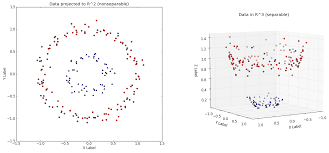

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# logistic regression best estimetor
log_reg = grid_log_reg.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 1], 'kernel': ['sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')